<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_samples/blob/master/iris_kmeans_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [7]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['label']=iris.target

In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
input_data=iris_df.iloc[:,:-1].values

In [12]:
def kmeans(k,X,max_iter=300):
  X_size,n_features=X.shape

  centroids=X[np.random.choice(X_size,k)]

  new_centroids=np.zeros((k,n_features))

  cluster=np.zeros(X_size)

  for epoch in range(max_iter):
    for i in range(X_size):
      distances=np.sum((centroids-X[i])**2,axis=1)

      cluster[i]=np.argsort(distances)[0]

    for j in range(k):
      new_centroids[j]=X[cluster==j].mean(axis=0)
    
    if np.sum(new_centroids==centroids)==k:
      print('break')
      break
    centroids=new_centroids
  return cluster

In [13]:
cluster=kmeans(3,input_data)

In [14]:
iris_df['cluster']=cluster

Text(0.5, 1.0, 'true label')

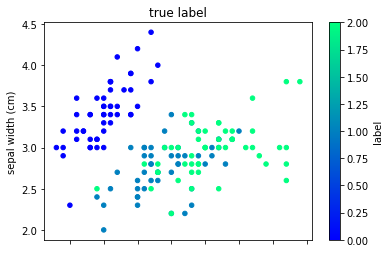

In [16]:
iris_df.plot(kind='scatter',x=0,y=1,c='label',cmap='winter')
plt.title('true label')

Text(0.5, 1.0, 'clustering relust')

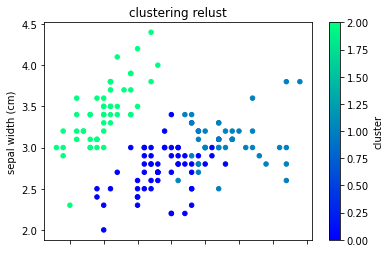

In [18]:
iris_df.plot(kind="scatter", x=0,y=1,c="cluster", cmap="winter")
plt.title("clustering relust")